In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/kaggle/input/schools-dataset/dv352-VIC schools ARR 2012-2023.xlsx', engine='openpyxl')

# Data Exploration

In [6]:
df.head()

,Year,School Sector,Sex,Year Range,ARR
0,2012,a. Government,a. Male,a. Years 7-12,0.767099
1,2012,a. Government,a. Male,b. Years 10-12,0.752766
2,2012,a. Government,b. Female,a. Years 7-12,0.899850
3,2012,a. Government,b. Female,b. Years 10-12,0.878860
4,2012,a. Government,c. Person,a. Years 7-12,0.830449


In [7]:
# get general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           360 non-null    int64  
 1   School Sector  360 non-null    object 
 2   Sex            360 non-null    object 
 3   Year Range     360 non-null    object 
 4   ARR            360 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.2+ KB


In [10]:
# get columns in data
df.columns

Index(['Year', 'School Sector', 'Sex', 'Year Range', 'ARR'], dtype='object')

In [33]:
# get unique year ranges
year_ranges = df['Year Range'].unique()
year_ranges

array(['a. Years 7-12', 'b. Years 10-12'], dtype=object)

# Data Cleaning

In [8]:
# drop empty rows
df = df.dropna(how='all')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           360 non-null    int64  
 1   School Sector  360 non-null    object 
 2   Sex            360 non-null    object 
 3   Year Range     360 non-null    object 
 4   ARR            360 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.2+ KB


# Data Exploration

In [19]:
# group by Yeah and School Sector, get ARR mean
sector_over_time = df.groupby(['Year', 'School Sector'])['ARR'].mean().reset_index()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'ARR by School Sector Over Time')

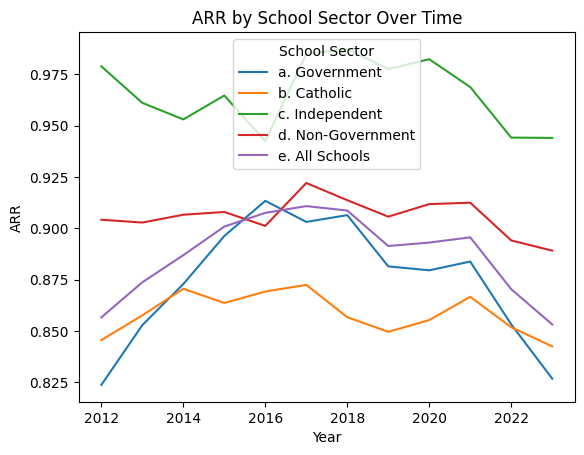

In [22]:
sns.lineplot(data=sector_over_time, x='Year', y='ARR', hue='School Sector')
plt.title('ARR by School Sector Over Time')

In [23]:
# group by School Sector and Sex
gender_sector_comparison = df.groupby(['School Sector', 'Sex'])['ARR'].mean().reset_index()

Text(0.5, 1.0, 'Average ARR by Sex Across School Sectors')

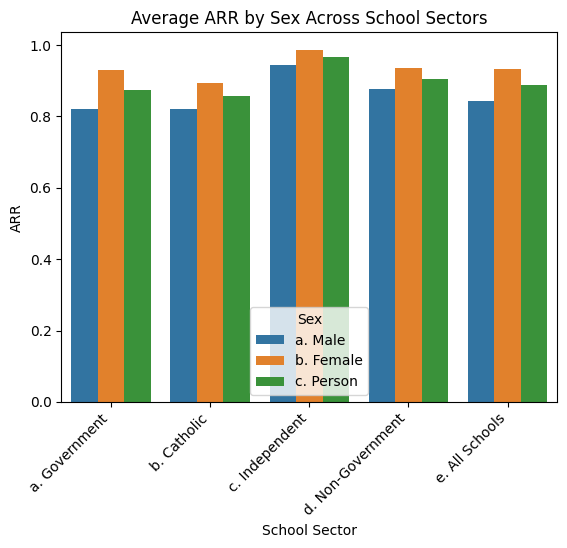

In [27]:
sns.barplot(data=gender_sector_comparison, x='School Sector', y='ARR', hue='Sex')
plt.xticks(rotation=45, ha='right')
plt.title('Average ARR by Sex Across School Sectors')

In [28]:
# group by Year and Year Range
year_range_comparison = df.groupby(['Year', 'Year Range'])['ARR'].mean().reset_index()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'ARR: Years 7–12 vs 10–12 Over Time')

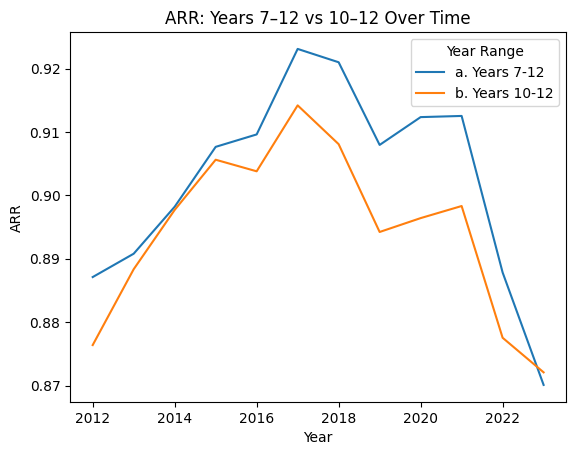

In [34]:
sns.lineplot(data=year_range_comparison, x='Year', y='ARR', hue='Year Range')
plt.title('ARR: Years 7–12 vs 10–12 Over Time')